In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot
from scipy import stats
from scipy.stats import norm, skew

In [2]:
import warnings
warnings.simplefilter("ignore")

In [3]:
#Import data
train = pd.read_csv('C:/Abood/DataScience/Kaggle/train.csv')
test = pd.read_csv('C:/Abood/DataScience/Kaggle/test.csv')

In [4]:
#Overall look the taining data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
#Comparing trainig and test sets
print(train.shape)
print(test.shape)
print(set(train.columns) - set(test.columns))

(1460, 81)
(1459, 80)
{'SalePrice'}


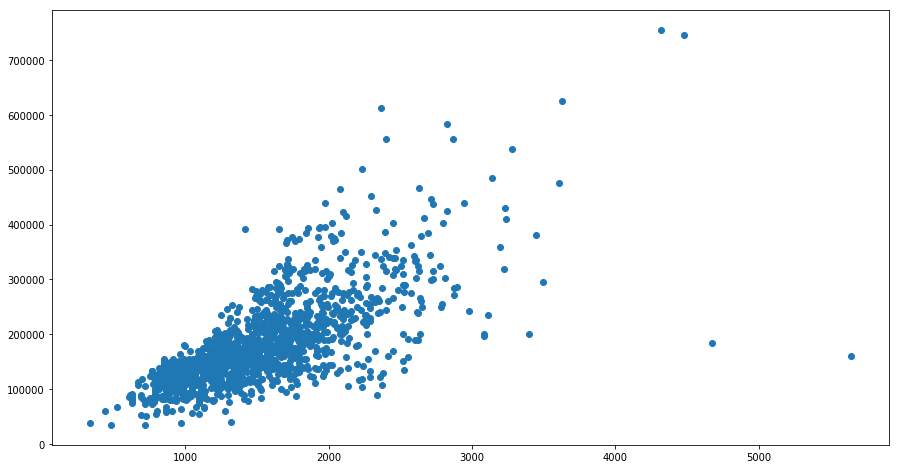

In [6]:
#Data documentation suggests to remove outliers in the training set by checking the GR LIV AREA against SalePrice
fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])

In [7]:
#Dropping 4 outlies which has GrLivArea > 4000
for i in train['GrLivArea']:
    if i > 4000:
        train = train.drop(train[train['GrLivArea'] == i].index)

In [8]:
train.shape

(1456, 81)

In [9]:
#Discovering our dependant variable 'SalePrice'
train['SalePrice'].describe()

count      1456.000000
mean     180151.233516
std       76696.592530
min       34900.000000
25%      129900.000000
50%      163000.000000
75%      214000.000000
max      625000.000000
Name: SalePrice, dtype: float64


 mu = 180151.23 and sigma = 76670.25



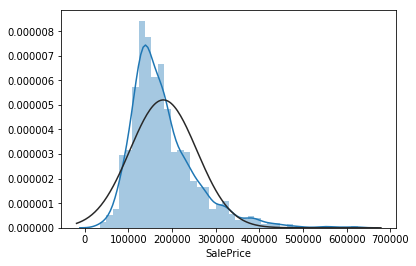

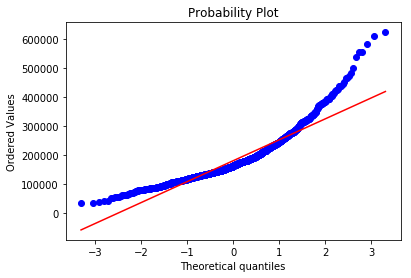

In [10]:
sns.distplot(train['SalePrice'] , fit=norm)

(mu, sigma) = norm.fit(train['SalePrice'])

print('\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [11]:
train['SalePrice'] = np.log1p(train['SalePrice'])


 mu = 12.02 and sigma = 0.40



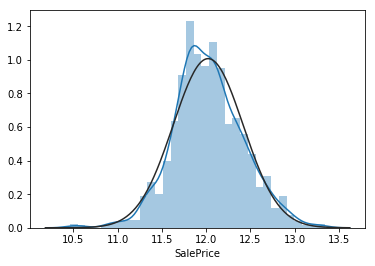

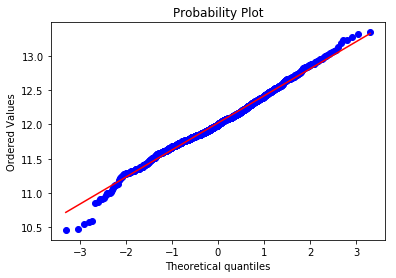

In [12]:
sns.distplot(train['SalePrice'] , fit=norm)

(mu, sigma) = norm.fit(train['SalePrice'])

print('\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [13]:
#Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']
#Drop Id column from both train and test
train.drop(['Id'], axis=1, inplace=True)
test.drop(['Id'], axis=1, inplace=True)

In [14]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train['SalePrice']
train.drop(['SalePrice'], axis=1, inplace=True)

In [15]:
all_data = pd.concat((train, test))

In [16]:
all_data.shape

(2915, 79)

In [17]:
all_data_na = round(((all_data.isnull().sum()/len(all_data))*100).sort_values(ascending=False),2)
all_data_na.drop(all_data_na[all_data_na==0].index, inplace=True)
print(all_data_na)

PoolQC          99.73
MiscFeature     96.40
Alley           93.21
Fence           80.45
FireplaceQu     48.71
LotFrontage     16.67
GarageCond       5.45
GarageQual       5.45
GarageYrBlt      5.45
GarageFinish     5.45
GarageType       5.39
BsmtCond         2.81
BsmtExposure     2.81
BsmtQual         2.78
BsmtFinType2     2.74
BsmtFinType1     2.71
MasVnrType       0.82
MasVnrArea       0.79
MSZoning         0.14
BsmtHalfBath     0.07
Utilities        0.07
Functional       0.07
BsmtFullBath     0.07
BsmtFinSF2       0.03
BsmtFinSF1       0.03
Exterior2nd      0.03
BsmtUnfSF        0.03
TotalBsmtSF      0.03
Exterior1st      0.03
SaleType         0.03
Electrical       0.03
KitchenQual      0.03
GarageArea       0.03
GarageCars       0.03
dtype: float64


Text(0.5,1,'Percent missing data by feature')

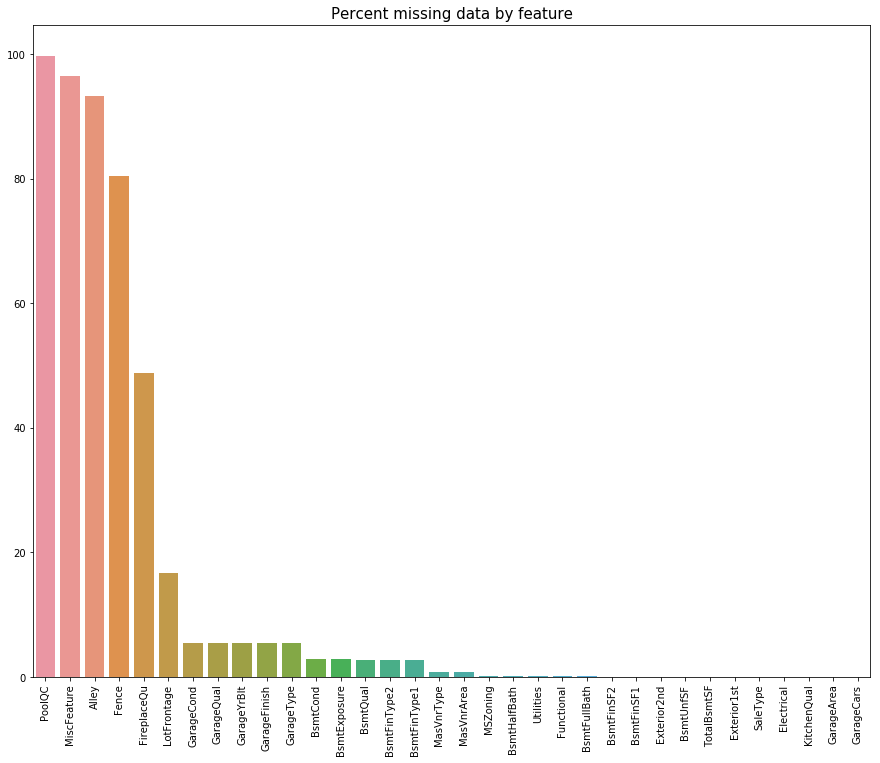

In [18]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.title('Percent missing data by feature', fontsize=15)

In [19]:
all_data['PoolQC'] = all_data['PoolQC'].fillna("None")

In [20]:
all_data['MiscFeature'] = all_data['MiscFeature'].fillna("None")

In [21]:
all_data['Alley'] = all_data['Alley'].fillna("None")

In [22]:
all_data['Fence'] = all_data['Fence'].fillna("None")

In [23]:
all_data['FireplaceQu'] = all_data['FireplaceQu'].fillna("None")

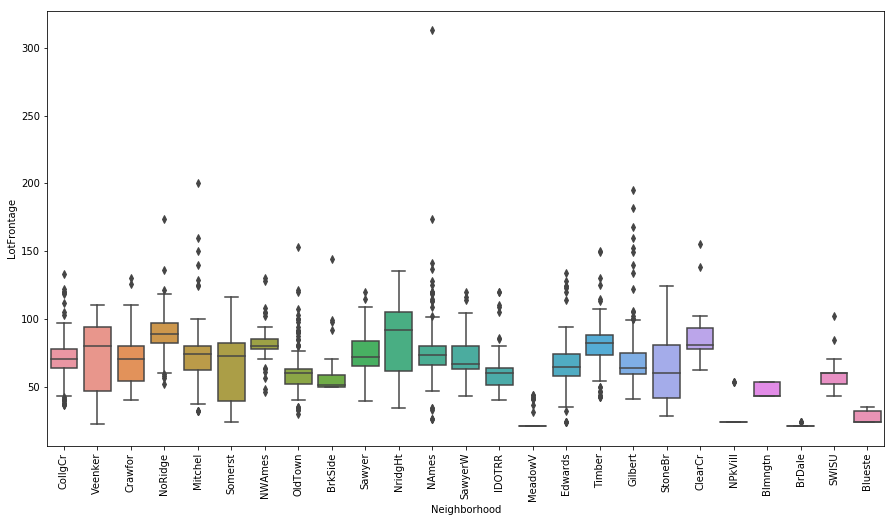

In [24]:
fig, ax = plt.subplots(figsize=(15,8))
plt.xticks(rotation='90')
sns.boxplot(x=all_data['Neighborhood'], y=all_data['LotFrontage'])

In [25]:
all_data['LotFrontage']=all_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x:x.fillna(x.median()))

In [26]:
for i in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[i] = all_data[i].fillna('None')

In [27]:
for i in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[i] = all_data[i].fillna(0)

In [28]:
for i in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[i] = all_data[i].fillna(0)

In [29]:
for i in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[i] = all_data[i].fillna('None')

In [30]:
all_data['MasVnrType'] = all_data['MasVnrType'].fillna('None')
all_data['MasVnrArea'] = all_data['MasVnrArea'].fillna(0)

In [31]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

In [32]:
all_data.drop(['Utilities'], axis=1, inplace=True)

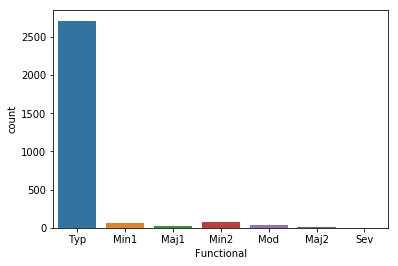

In [33]:
sns.countplot(all_data['Functional'])

In [34]:
all_data['Functional'].fillna('Typ', inplace=True)

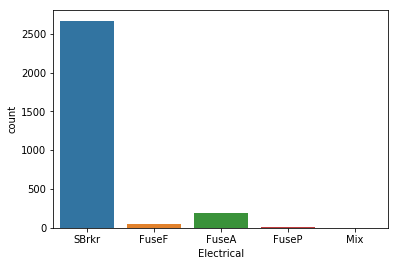

In [35]:
sns.countplot(all_data['Electrical'])

In [36]:
all_data['Electrical'].fillna(all_data['Electrical'].mode()[0], inplace=True)

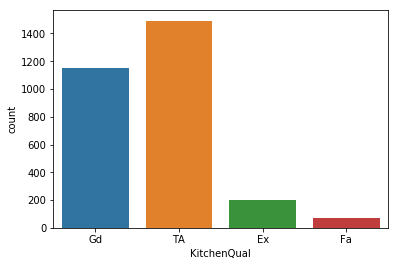

In [37]:
sns.countplot(all_data['KitchenQual'])

In [38]:
all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0], inplace=True)

In [39]:
all_data['Exterior1st'].isnull().sum()

1

In [40]:
#SaleType   
#Exterior1st    
#Exterior2nd

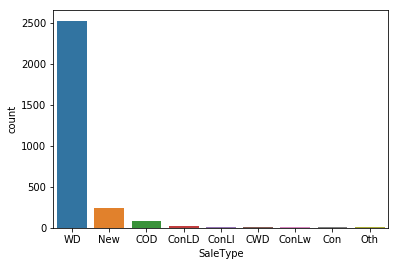

In [41]:
sns.countplot(all_data['SaleType'])

In [42]:
all_data['SaleType'].fillna(all_data['SaleType'].mode()[0], inplace=True)

In [43]:
all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0], inplace=True)
all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0], inplace=True)

In [44]:
all_data_na = round(((all_data.isnull().sum()/len(all_data))*100).sort_values(ascending=False),2)
all_data_na.drop(all_data_na[all_data_na==0].index, inplace=True)
print(all_data_na)

Series([], dtype: float64)


In [45]:
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)

In [46]:
all_data['MSSubClass'].dtype

dtype('O')

In [47]:
all_data['OverallCond']=all_data['OverallCond'].astype('str')
all_data['OverallCond'].dtype

dtype('O')

In [48]:
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [49]:
#from sklearn.preprocessing import LabelEncoder


In [50]:
all_data.info()
print(all_data.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2915 entries, 0 to 1458
Data columns (total 78 columns):
MSSubClass       2915 non-null object
MSZoning         2915 non-null object
LotFrontage      2915 non-null float64
LotArea          2915 non-null int64
Street           2915 non-null object
Alley            2915 non-null object
LotShape         2915 non-null object
LandContour      2915 non-null object
LotConfig        2915 non-null object
LandSlope        2915 non-null object
Neighborhood     2915 non-null object
Condition1       2915 non-null object
Condition2       2915 non-null object
BldgType         2915 non-null object
HouseStyle       2915 non-null object
OverallQual      2915 non-null int64
OverallCond      2915 non-null object
YearBuilt        2915 non-null int64
YearRemodAdd     2915 non-null int64
RoofStyle        2915 non-null object
RoofMatl         2915 non-null object
Exterior1st      2915 non-null object
Exterior2nd      2915 non-null object
MasVnrType       2915 

In [51]:
from sklearn.preprocessing import LabelEncoder
lbl=LabelEncoder()
all_data_encoded=all_data.copy()
for i in all_data_encoded:
    if all_data_encoded[i].dtype == 'O':
        all_data_encoded[i] = lbl.fit_transform(all_data_encoded[i])

In [52]:
all_data_encoded.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,10,3,65.0,8450,1,1,3,3,4,0,...,0,0,3,4,1,0,4,2,8,4
1,5,3,80.0,9600,1,1,3,3,2,0,...,0,0,3,4,1,0,7,1,8,4
2,10,3,68.0,11250,1,1,0,3,4,0,...,0,0,3,4,1,0,11,2,8,4
3,11,3,60.0,9550,1,1,0,3,0,0,...,0,0,3,4,1,0,4,0,8,0
4,10,3,84.0,14260,1,1,0,3,2,0,...,0,0,3,4,1,0,3,2,8,4


In [53]:
all_data_encoded.shape

(2915, 78)

In [54]:
train_features=all_data_encoded[:ntrain]
train_features.shape

(1456, 78)

In [55]:
y_train.shape

(1456,)

In [56]:
test_features=all_data_encoded[ntrain:]
test_features.shape

(1459, 78)

In [65]:
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import Ridge
alpha=[0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
ridge_score= []
for i in alpha:
    ridge=Ridge(alpha=i, copy_X=True, fit_intercept=True)
    scores = cross_val_score(ridge, train_features, y_train)   
    ridge_score.append(scores.mean())
print(ridge_score)    

[0.901542854856901, 0.9015816182105891, 0.9016976241489164, 0.9019078528516715, 0.902061518772729, 0.9017760538635581, 0.9012630627771493, 0.9009687597240589]


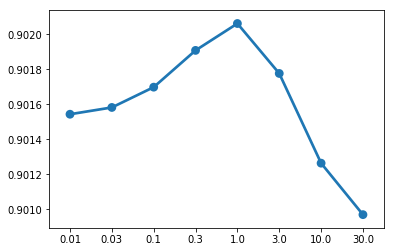

In [76]:
sns.pointplot(x=alpha, y=ridge_score)

In [81]:
alpha=np.arange(0.3, 1.5, 0.1)
ridge_score= []
for i in alpha:
    ridge=Ridge(alpha=i, copy_X=True, fit_intercept=True)
    scores = cross_val_score(ridge, train_features, y_train)   
    ridge_score.append(scores.mean())
print(ridge_score) 

[0.9019078528516715, 0.9019684460982726, 0.9020098289975603, 0.9020369650011227, 0.9020534172801894, 0.9020617879284707, 0.9020640056676408, 0.902061518772729, 0.9020554271494037, 0.902046574441266, 0.9020356133377514, 0.9020230525787306]


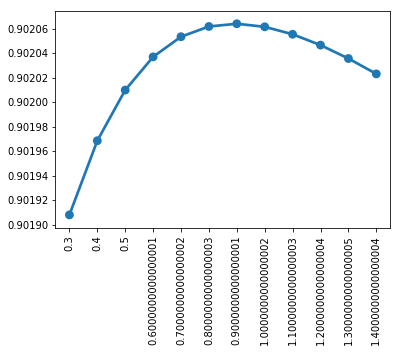

In [85]:
fig, ax = plt.subplots()
plt.xticks(rotation='90')
sns.pointplot(x=alpha, y=ridge_score, ax=ax)

In [87]:
#alpha is 0.85
ridge=Ridge(alpha=0.85, copy_X=True, fit_intercept=True)
# Use all training data to fit the model
ridge.fit(train_features,y_train)

Ridge(alpha=0.85, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [90]:
predicted = np.expm1(ridge.predict(test_features))
submission=pd.DataFrame()
submission['Id']=test_ID
submission['SalePrice']=predicted
submission.to_csv('submission.csv', index=False)